In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [4]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f42df33d7e018d605ccf2fbc49fe29e9


In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=13000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=13000)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

2717

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sandnessjoen
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | buala
Processing Record 8 of Set 1 | mehamn
Processing Record 9 of Set 1 | catalao
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | yar-sale
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | nador
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | kitahiroshima
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | puri
Processing Record 21 of Set 1 | boguchany
Processing Record 22 of Set 1 | tuktoyaktuk
Processin

Processing Record 38 of Set 4 | tazovskiy
Processing Record 39 of Set 4 | pangnirtung
Processing Record 40 of Set 4 | omsukchan
Processing Record 41 of Set 4 | san carlos de bariloche
Processing Record 42 of Set 4 | carutapera
Processing Record 43 of Set 4 | merrill
Processing Record 44 of Set 4 | alto baudo
City not found. Skipping...
Processing Record 45 of Set 4 | moussoro
Processing Record 46 of Set 4 | buta
Processing Record 47 of Set 4 | zabaykalsk
Processing Record 48 of Set 4 | krasnotorka
Processing Record 49 of Set 4 | amderma
City not found. Skipping...
Processing Record 50 of Set 4 | chhatak
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | ibra
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | kapustin yar
Processing Record 6 of Set 5 | east london
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | ribeira grande
Processing Record 9

Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | pathalgaon
Processing Record 27 of Set 8 | artyk
City not found. Skipping...
Processing Record 28 of Set 8 | omama
Processing Record 29 of Set 8 | rodrigues alves
Processing Record 30 of Set 8 | pecanha
Processing Record 31 of Set 8 | mayumba
Processing Record 32 of Set 8 | buncrana
Processing Record 33 of Set 8 | ballina
Processing Record 34 of Set 8 | biaora
Processing Record 35 of Set 8 | taybad
Processing Record 36 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 37 of Set 8 | guamuchil
Processing Record 38 of Set 8 | satitoa
City not found. Skipping...
Processing Record 39 of Set 8 | oskarshamn
Processing Record 40 of Set 8 | katherine
Processing Record 41 of Set 8 | san francisco
Processing Record 42 of Set 8 | manyana
Processing Record 43 of Set 8 | kungurtug
Processing Record 44 of Set 8 | tecoanapa
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | bondo
Process

Processing Record 14 of Set 12 | oranjemund
Processing Record 15 of Set 12 | sobolevo
Processing Record 16 of Set 12 | tuy hoa
Processing Record 17 of Set 12 | oksovskiy
Processing Record 18 of Set 12 | dengfeng
Processing Record 19 of Set 12 | huarmey
Processing Record 20 of Set 12 | tamandare
Processing Record 21 of Set 12 | hodal
Processing Record 22 of Set 12 | ziarat
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | alugan
Processing Record 25 of Set 12 | west bend
Processing Record 26 of Set 12 | hailar
Processing Record 27 of Set 12 | puerto narino
Processing Record 28 of Set 12 | kirksville
Processing Record 29 of Set 12 | mgandu
Processing Record 30 of Set 12 | nadym
Processing Record 31 of Set 12 | puerto baquerizo moreno
Processing Record 32 of Set 12 | talnakh
Processing Record 33 of Set 12 | calabozo
Processing Record 34 of Set 12 | ust-maya
Processing Record 35 of Set 12 | kargasok
Processing Record 36 of Set 12 | ayan
Processing 

Processing Record 49 of Set 15 | rolim de moura
City not found. Skipping...
Processing Record 50 of Set 15 | charagua
Processing Record 1 of Set 16 | virginia beach
Processing Record 2 of Set 16 | moissala
Processing Record 3 of Set 16 | skjervoy
Processing Record 4 of Set 16 | yangshe
Processing Record 5 of Set 16 | meulaboh
Processing Record 6 of Set 16 | telde
Processing Record 7 of Set 16 | tias
Processing Record 8 of Set 16 | laramie
Processing Record 9 of Set 16 | formoso do araguaia
City not found. Skipping...
Processing Record 10 of Set 16 | asau
Processing Record 11 of Set 16 | farafangana
Processing Record 12 of Set 16 | stockton-on-tees
Processing Record 13 of Set 16 | praya
Processing Record 14 of Set 16 | pangkalanbuun
Processing Record 15 of Set 16 | zyryanka
Processing Record 16 of Set 16 | villa florida
Processing Record 17 of Set 16 | nuqui
Processing Record 18 of Set 16 | barawe
City not found. Skipping...
Processing Record 19 of Set 16 | rorvik
Processing Record 20 o

Processing Record 39 of Set 19 | svobodnyy
Processing Record 40 of Set 19 | vung tau
Processing Record 41 of Set 19 | imbituba
Processing Record 42 of Set 19 | filingue
Processing Record 43 of Set 19 | jumla
Processing Record 44 of Set 19 | konakovo
Processing Record 45 of Set 19 | kegayli
City not found. Skipping...
Processing Record 46 of Set 19 | tailai
Processing Record 47 of Set 19 | guaratinga
Processing Record 48 of Set 19 | santa cruz del sur
Processing Record 49 of Set 19 | dobele
Processing Record 50 of Set 19 | gisborne
Processing Record 1 of Set 20 | longido
Processing Record 2 of Set 20 | kolaras
Processing Record 3 of Set 20 | juba
Processing Record 4 of Set 20 | niono
Processing Record 5 of Set 20 | barceloneta
Processing Record 6 of Set 20 | puebla
Processing Record 7 of Set 20 | viedma
Processing Record 8 of Set 20 | taganak
Processing Record 9 of Set 20 | hailun
Processing Record 10 of Set 20 | aurangabad
Processing Record 11 of Set 20 | ondjiva
Processing Record 12 o

Processing Record 28 of Set 23 | severomuysk
Processing Record 29 of Set 23 | ahar
Processing Record 30 of Set 23 | general cepeda
Processing Record 31 of Set 23 | puerto escondido
Processing Record 32 of Set 23 | les cayes
Processing Record 33 of Set 23 | beberibe
Processing Record 34 of Set 23 | port-gentil
Processing Record 35 of Set 23 | san miguel
Processing Record 36 of Set 23 | bijie
Processing Record 37 of Set 23 | ranong
Processing Record 38 of Set 23 | bikaner
Processing Record 39 of Set 23 | rapid city
Processing Record 40 of Set 23 | vuktyl
Processing Record 41 of Set 23 | osa
Processing Record 42 of Set 23 | orlik
Processing Record 43 of Set 23 | nabire
Processing Record 44 of Set 23 | inongo
Processing Record 45 of Set 23 | kitui
Processing Record 46 of Set 23 | nago
Processing Record 47 of Set 23 | naliya
Processing Record 48 of Set 23 | tirumullaivasal
Processing Record 49 of Set 23 | bonavista
Processing Record 50 of Set 23 | meyungs
City not found. Skipping...
Process

Processing Record 14 of Set 27 | acarau
Processing Record 15 of Set 27 | plettenberg bay
Processing Record 16 of Set 27 | takaka
Processing Record 17 of Set 27 | atyashevo
Processing Record 18 of Set 27 | maniitsoq
Processing Record 19 of Set 27 | shushenskoye
Processing Record 20 of Set 27 | khvastovichi
Processing Record 21 of Set 27 | plouzane
Processing Record 22 of Set 27 | cockburn town
Processing Record 23 of Set 27 | coolum beach
Processing Record 24 of Set 27 | razole
Processing Record 25 of Set 27 | potiskum
Processing Record 26 of Set 27 | surany
Processing Record 27 of Set 27 | luau
Processing Record 28 of Set 27 | saurimo
Processing Record 29 of Set 27 | dalby
Processing Record 30 of Set 27 | smolenka
Processing Record 31 of Set 27 | awans
Processing Record 32 of Set 27 | tarko-sale
Processing Record 33 of Set 27 | dagana
Processing Record 34 of Set 27 | freeport
Processing Record 35 of Set 27 | hella
Processing Record 36 of Set 27 | sibu
Processing Record 37 of Set 27 | f

Processing Record 5 of Set 31 | dayong
Processing Record 6 of Set 31 | mbigou
Processing Record 7 of Set 31 | terrace
Processing Record 8 of Set 31 | bolonchen
City not found. Skipping...
Processing Record 9 of Set 31 | jasper
Processing Record 10 of Set 31 | barcelos
Processing Record 11 of Set 31 | palaiokhora
City not found. Skipping...
Processing Record 12 of Set 31 | porto velho
Processing Record 13 of Set 31 | leon
Processing Record 14 of Set 31 | sisimiut
Processing Record 15 of Set 31 | houston
Processing Record 16 of Set 31 | jurado
Processing Record 17 of Set 31 | noyabrsk
Processing Record 18 of Set 31 | tungkang
City not found. Skipping...
Processing Record 19 of Set 31 | haapu
City not found. Skipping...
Processing Record 20 of Set 31 | warqla
City not found. Skipping...
Processing Record 21 of Set 31 | zhangye
Processing Record 22 of Set 31 | penzance
Processing Record 23 of Set 31 | dabakala
Processing Record 24 of Set 31 | chlorakas
Processing Record 25 of Set 31 | gao


Processing Record 36 of Set 34 | puerto colombia
Processing Record 37 of Set 34 | falkoping
City not found. Skipping...
Processing Record 38 of Set 34 | recreio
Processing Record 39 of Set 34 | lamesa
Processing Record 40 of Set 34 | tomatlan
Processing Record 41 of Set 34 | san manuel
Processing Record 42 of Set 34 | ahuimanu
Processing Record 43 of Set 34 | kizema
Processing Record 44 of Set 34 | krasnyy kut
Processing Record 45 of Set 34 | lander
Processing Record 46 of Set 34 | grieskirchen
Processing Record 47 of Set 34 | vilhena
Processing Record 48 of Set 34 | el cope
Processing Record 49 of Set 34 | kaoma
Processing Record 50 of Set 34 | svetlaya
Processing Record 1 of Set 35 | winneba
Processing Record 2 of Set 35 | kuche
City not found. Skipping...
Processing Record 3 of Set 35 | mashhad
Processing Record 4 of Set 35 | thenzawl
Processing Record 5 of Set 35 | oussouye
Processing Record 6 of Set 35 | strelka
Processing Record 7 of Set 35 | palauig
Processing Record 8 of Set 35

Processing Record 24 of Set 38 | aparecida do taboado
Processing Record 25 of Set 38 | buloh kasap
Processing Record 26 of Set 38 | saint-jean-port-joli
Processing Record 27 of Set 38 | medicine hat
Processing Record 28 of Set 38 | qostanay
Processing Record 29 of Set 38 | kalmar
Processing Record 30 of Set 38 | sao miguel do araguaia
Processing Record 31 of Set 38 | notse
Processing Record 32 of Set 38 | paicandu
Processing Record 33 of Set 38 | khalkhal
Processing Record 34 of Set 38 | chaumont
Processing Record 35 of Set 38 | scalloway
City not found. Skipping...
Processing Record 36 of Set 38 | akureyri
Processing Record 37 of Set 38 | presidencia roque saenz pena
Processing Record 38 of Set 38 | mahanoro
Processing Record 39 of Set 38 | lowestoft
Processing Record 40 of Set 38 | santa catarina de tepehuanes
Processing Record 41 of Set 38 | tarabuco
Processing Record 42 of Set 38 | bullhead city
Processing Record 43 of Set 38 | banjar
Processing Record 44 of Set 38 | crucea
Process

Processing Record 9 of Set 42 | phan rang
City not found. Skipping...
Processing Record 10 of Set 42 | roald
Processing Record 11 of Set 42 | ozgon
City not found. Skipping...
Processing Record 12 of Set 42 | rosario
Processing Record 13 of Set 42 | camalu
Processing Record 14 of Set 42 | tumpat
Processing Record 15 of Set 42 | muisne
Processing Record 16 of Set 42 | nanakuli
Processing Record 17 of Set 42 | singaparna
Processing Record 18 of Set 42 | karauzyak
City not found. Skipping...
Processing Record 19 of Set 42 | tacotalpa
Processing Record 20 of Set 42 | mapiripan
Processing Record 21 of Set 42 | vredendal
Processing Record 22 of Set 42 | menongue
Processing Record 23 of Set 42 | skagastrond
City not found. Skipping...
Processing Record 24 of Set 42 | allapalli
Processing Record 25 of Set 42 | campbell river
Processing Record 26 of Set 42 | mangrol
Processing Record 27 of Set 42 | floresta
Processing Record 28 of Set 42 | kawana waters
City not found. Skipping...
Processing Re

Processing Record 40 of Set 45 | laohekou
Processing Record 41 of Set 45 | brazzaville
Processing Record 42 of Set 45 | borovoy
Processing Record 43 of Set 45 | palu
Processing Record 44 of Set 45 | siuna
Processing Record 45 of Set 45 | tanjong malim
City not found. Skipping...
Processing Record 46 of Set 45 | sebina
Processing Record 47 of Set 45 | lamu
Processing Record 48 of Set 45 | salinas
Processing Record 49 of Set 45 | cao bang
Processing Record 50 of Set 45 | tutoia
Processing Record 1 of Set 46 | port moresby
Processing Record 2 of Set 46 | molepolole
Processing Record 3 of Set 46 | novosergiyevka
Processing Record 4 of Set 46 | ostuacan
Processing Record 5 of Set 46 | hanzhong
Processing Record 6 of Set 46 | redcar
Processing Record 7 of Set 46 | narasannapeta
Processing Record 8 of Set 46 | balabac
Processing Record 9 of Set 46 | revelstoke
Processing Record 10 of Set 46 | la serena
Processing Record 11 of Set 46 | tuscaloosa
Processing Record 12 of Set 46 | tortosa
Proces

Processing Record 24 of Set 49 | sankt wendel
Processing Record 25 of Set 49 | kerki
City not found. Skipping...
Processing Record 26 of Set 49 | umba
Processing Record 27 of Set 49 | xudat
Processing Record 28 of Set 49 | odesskoye
Processing Record 29 of Set 49 | bolshoye selo
Processing Record 30 of Set 49 | katastarion
Processing Record 31 of Set 49 | nizhniy kuranakh
Processing Record 32 of Set 49 | tolaga bay
Processing Record 33 of Set 49 | conway
Processing Record 34 of Set 49 | malumfashi
Processing Record 35 of Set 49 | drayton valley
Processing Record 36 of Set 49 | temiscaming
Processing Record 37 of Set 49 | hope
Processing Record 38 of Set 49 | sao raimundo nonato
Processing Record 39 of Set 49 | waukesha
Processing Record 40 of Set 49 | ostersund
Processing Record 41 of Set 49 | mizpe ramon
City not found. Skipping...
Processing Record 42 of Set 49 | uglovskoye
Processing Record 43 of Set 49 | belaya gora
Processing Record 44 of Set 49 | shakhtinsk
Processing Record 45 o

Processing Record 14 of Set 53 | korem
Processing Record 15 of Set 53 | pierre
Processing Record 16 of Set 53 | chernyshevsk
Processing Record 17 of Set 53 | gujar khan
Processing Record 18 of Set 53 | chiredzi
Processing Record 19 of Set 53 | cooma
Processing Record 20 of Set 53 | fraserburgh
Processing Record 21 of Set 53 | babanusah
City not found. Skipping...
Processing Record 22 of Set 53 | entre rios
Processing Record 23 of Set 53 | catio
Processing Record 24 of Set 53 | republic
Processing Record 25 of Set 53 | masterton
Processing Record 26 of Set 53 | gambo
Processing Record 27 of Set 53 | meinung
City not found. Skipping...
Processing Record 28 of Set 53 | sandwick
Processing Record 29 of Set 53 | niquero
Processing Record 30 of Set 53 | deyang
Processing Record 31 of Set 53 | yalvac
Processing Record 32 of Set 53 | bonaventure
Processing Record 33 of Set 53 | cody
Processing Record 34 of Set 53 | barra do bugres
Processing Record 35 of Set 53 | shumerlya
Processing Record 36

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sandnessjoen,66.02,12.63,37.40,93,75,25.28,NO,2020-02-21 05:49:19
1,Castro,-24.79,-50.01,66.92,94,35,4.03,BR,2020-02-21 05:49:20
2,Butaritari,3.07,172.79,83.97,78,77,13.67,KI,2020-02-21 05:49:20
3,Albany,42.60,-73.97,21.20,48,75,8.05,US,2020-02-21 05:46:13
4,Kruisfontein,-34.00,24.73,68.09,76,3,4.34,ZA,2020-02-21 05:49:20
5,Buala,-8.14,159.59,85.78,68,100,8.05,SB,2020-02-21 05:49:20
6,Mehamn,71.04,27.85,26.60,92,90,16.11,NO,2020-02-21 05:49:21
7,Catalao,-18.17,-47.95,68.04,94,100,3.24,BR,2020-02-21 05:49:21
8,Tasiilaq,65.61,-37.64,19.40,73,100,1.12,GL,2020-02-21 05:49:21
9,Yar-Sale,66.83,70.83,12.90,90,94,17.11,RU,2020-02-21 05:49:21


In [28]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sandnessjoen,NO,2020-02-21 05:49:19,66.02,12.63,37.40,93,75,25.28
1,Castro,BR,2020-02-21 05:49:20,-24.79,-50.01,66.92,94,35,4.03
2,Butaritari,KI,2020-02-21 05:49:20,3.07,172.79,83.97,78,77,13.67
3,Albany,US,2020-02-21 05:46:13,42.60,-73.97,21.20,48,75,8.05
4,Kruisfontein,ZA,2020-02-21 05:49:20,-34.00,24.73,68.09,76,3,4.34
5,Buala,SB,2020-02-21 05:49:20,-8.14,159.59,85.78,68,100,8.05
6,Mehamn,NO,2020-02-21 05:49:21,71.04,27.85,26.60,92,90,16.11
7,Catalao,BR,2020-02-21 05:49:21,-18.17,-47.95,68.04,94,100,3.24
8,Tasiilaq,GL,2020-02-21 05:49:21,65.61,-37.64,19.40,73,100,1.12
9,Yar-Sale,RU,2020-02-21 05:49:21,66.83,70.83,12.90,90,94,17.11


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582306064.9871428

In [34]:
#Convert to string format method (readable)
today = time.strftime("%x")
today

'02/21/20'

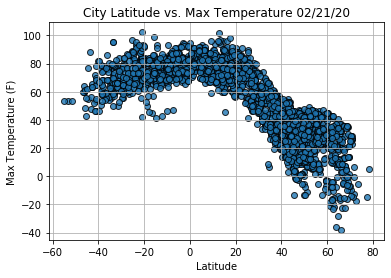

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

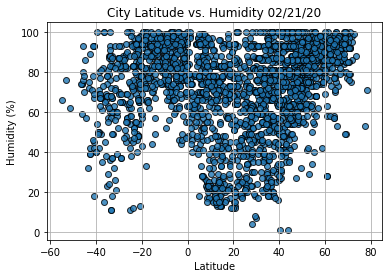

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

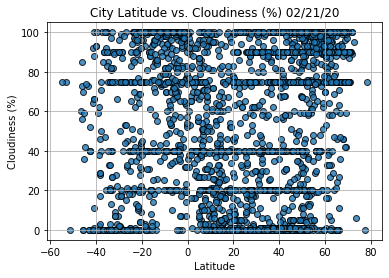

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()